In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
%matplotlib inline

In [44]:
df = pd.read_excel("new dtp.xls")

In [45]:
df

,Country,CARS,DEV,LENTH,ALC,DTP
0,Afghanistan,1.431364,0,1.813558,-1.522879,1.399674
1,Albania,2.056905,0,2.796665,0.862728,0.968483
2,Algeria,2.037426,0,1.678694,-0.161151,1.161368
3,Angola,1.605089,0,1.615446,0.745855,1.558709
4,Argentina,2.522236,0,1.922323,0.970812,1.086360
...,...,...,...,...,...,...
139,Venezuela (Bolivarian Republic of Venezuela),2.192623,0,2.022953,0.880814,1.553883
140,Viet Nam,1.139249,0,2.738661,0.592177,1.414973
141,Yemen,1.569374,0,2.130480,-0.698970,1.571709
142,Zambia,1.322219,0,2.084564,0.551450,1.578639


In [46]:
df.describe(include= 'all')

,Country,CARS,DEV,LENTH,ALC,DTP
count,144,144.000000,144.000000,144.000000,144.000000,144.000000
unique,144,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.996071,0.201389,2.455609,0.646362,1.179878
std,NaN,0.669128,0.402438,0.632256,0.550255,0.283553
min,NaN,0.301030,0.000000,0.676599,-1.522879,0.491362
25%,NaN,1.562106,0.000000,2.030297,0.489572,0.998909
50%,NaN,2.102060,0.000000,2.468691,0.809220,1.209515
75%,NaN,2.554101,0.000000,2.923985,1.008707,1.375638


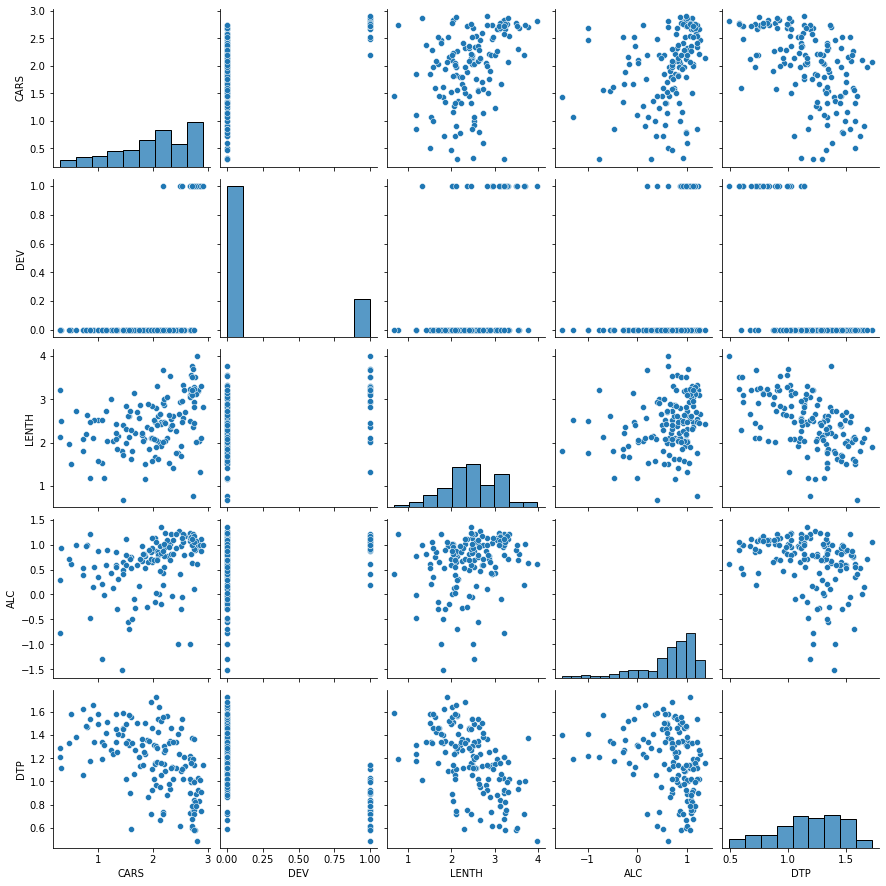

In [47]:
sns.pairplot(data = df)

In [48]:
model = LinearRegression()

In [49]:
x = df['CARS']
x

0      1.431364
1      2.056905
2      2.037426
3      1.605089
4      2.522236
         ...   
139    2.192623
140    1.139249
141    1.569374
142    1.322219
143    2.082211
Name: CARS, Length: 144, dtype: float64

In [50]:
y = df["DTP"]
y

0      1.399674
1      0.968483
2      1.161368
3      1.558709
4      1.086360
         ...   
139    1.553883
140    1.414973
141    1.571709
142    1.578639
143    1.285557
Name: DTP, Length: 144, dtype: float64

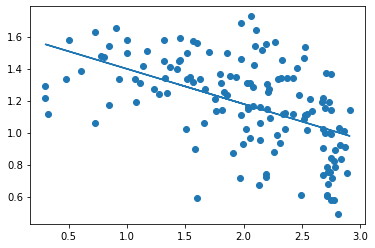

In [51]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()


In [53]:
y = df['DTP']
x = df[['CARS',
        'LENTH',
        'ALC',
        'DEV']]
        
x = sm.add_constant(x)
x.head()

C:\Users\Mikayel\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,CARS,LENTH,ALC,DEV
0,1.0,1.431364,1.813558,-1.522879,0
1,1.0,2.056905,2.796665,0.862728,0
2,1.0,2.037426,1.678694,-0.161151,0
3,1.0,1.605089,1.615446,0.745855,0
4,1.0,2.522236,1.922323,0.970812,0


In [56]:
model = sm.OLS(y, x) 
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DTP   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     52.01
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           1.21e-17
Time:                        00:32:10   Log-Likelihood:                 17.451
No. Observations:                 144   AIC:                            -28.90
Df Residuals:                     141   BIC:                            -19.99
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3015      0.028     46.423      0.000       1.246       1.357
ALC           -0.0538      0.035     -1.557      0.122      -0.122       0.015
DEV           -0.4313      0.047     -9.126      0.000      -0.525      -0.338
==============================================================================
Omnibus:                        3.540   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                3.192
Skew:                          -0.361   Prob(JB):                        0.203
Kurtosis:                       3.108   Cond. No.                         3.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
y = df['DTP']
x = df[['ALC',
        'DEV']]
        
x = sm.add_constant(x)
x.head()

C:\Users\Mikayel\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,ALC,DEV
0,1.0,-1.522879,0
1,1.0,0.862728,0
2,1.0,-0.161151,0
3,1.0,0.745855,0
4,1.0,0.970812,0


In [57]:
model = sm.OLS(y, x) 
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DTP   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     52.01
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           1.21e-17
Time:                        00:32:20   Log-Likelihood:                 17.451
No. Observations:                 144   AIC:                            -28.90
Df Residuals:                     141   BIC:                            -19.99
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3015      0.028     46.423      0.000       1.246       1.357
ALC           -0.0538      0.035     -1.557      0.122      -0.122       0.015
DEV           -0.4313      0.047     -9.126      0.000      -0.525      -0.338
==============================================================================
Omnibus:                        3.540   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                3.192
Skew:                          -0.361   Prob(JB):                        0.203
Kurtosis:                       3.108   Cond. No.                         3.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""